In [1]:
print("hello world ")

hello world 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics import silhouette_score#this is for clustering accuracy 
#score calculate 

# range -1 to 1  (+1 ar dike gele score vhalo )

In [3]:
df=pd.read_csv("irish.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Select feature for clustering 

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Label deoya theke na mulotoo


In [5]:
# we workonly two feature 

x=df[['sepal_length','sepal_width']]
x.head(4)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


Feature scaling

In [6]:
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)

In [ ]:
#select k
k=3

# implementing  k means 
K_means=KMeans(
    n_clusters=k,
    init="k-means++",#this means amra je centroid nibo tarmodde jeno maximum distance theke jeno kacha kachi na hoy
    
    max_iter=300,
    random_state=42
)

In [9]:
#fit thr model
K_means.fit(x_scale)

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [13]:
#getting  clusters assignments
labels=K_means.labels_
labels[:72]



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1], dtype=int32)

In [14]:
df['cluster']=labels
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
5,5.4,3.9,1.7,0.4,setosa,2


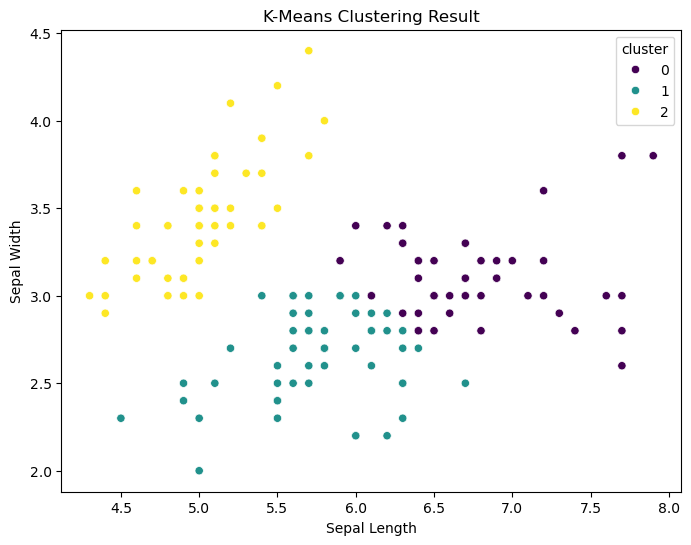

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["sepal_length"],
    y=df["sepal_width"],
    hue=df["cluster"],
    palette="viridis"
)

plt.title("K-Means Clustering Result")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

Finding optimal  K value (Elbow method)

In [16]:
#find the optimal  k value 

interia=[]

k_range=range(1,11)
for k in k_range:
    km=KMeans(n_clusters=k,init="k-means++",random_state=42)
    km.fit(x_scale)
    interia.append(km.inertia_)

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

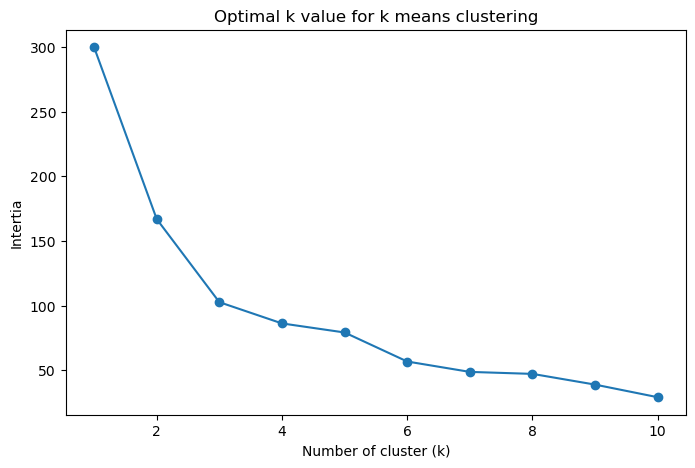

In [17]:
# see the diagram 
plt.figure(figsize=(8,5))

plt.plot(k_range,interia,marker="o")
plt.xlabel("Number of cluster (k)")
plt.ylabel("Intertia")

plt.title("Optimal k value for k means clustering")

plt.show()

Here 3 and 4 is proper value for k means 

In [19]:
score=silhouette_score(x_scale,labels)

print("score is :",score)

score is : 0.4343127417012513


Interpretation guide:
- Above 0.5 → strong clustering
- Around 0.2–0.4 → overlapping clusters
- Near 0 → useless clustering

Limitation of K means 

- Requires choosing k manually

- Sensitive to feature scaling

- Fails with non-spherical clusters

- Sensitive to outliers

- Distance-based, not density-based

## 🔹 Section 11: Real-World Use Cases

**Works well for:**
- Customer segmentation
- Image compression
- Market grouping
- Sensor data clustering

**Avoid using for:**
- Arbitrary-shaped clusters
- Highly skewed data
- Strong outliers


Final summary of k means clustering 


Key Takeaways:

- K-Means finds structure, not truth

- Scaling is mandatory

- k must be chosen carefully

- Always visualize results

- Never trust clusters blindly
